<a href="https://colab.research.google.com/github/yeahginny/Data-Analysis-School/blob/main/0829_folium(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,783 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

## folium 개요

folium은 `leaflet.js` 기반으로 만들어진 Python 지도 시각화 라이브러리 입니다.

[도큐먼트](https://python-visualization.github.io/folium/)

folium을 사용하여 인터랙티브한 지도를 생성하고 **마커를 추가**하여 시각화하거나 **원으로 범위를 표기**하고 `html` 파일로 내보내기 등을 수행할 수 있습니다.

## folium 설치

`pip install folium`으로 라이브러리를 설치할 수 있습니다.

In [ ]:
# !pip install folium

모듈 import

In [ ]:
import folium

## 기본 좌표 설정

`location`에 위도, 경도 정보를 입력하여 입력한 **위,경도 좌표**를 기준으로 지도를 그릴 수 있습니다.

이때 `zoom_start` 정보를 지정하여 **확대**의 정도를 지정할 수 있습니다.

In [ ]:
# 위도
latitude = 33.361936
# 경도
longitude = 126.529165

In [ ]:
# 위도
latitude = 33.50028185187966
# 경도
longitude = 126.53145977090163

In [ ]:
# 제주시청 - 클릭 위치의 위도는 33.50028185187966, 경도는 126.53145977090163 입니다

In [ ]:
# http://map.esran.com/

In [ ]:

# 코드입력
m = folium.Map(location=[latitude, longitude],
               zoom_start=10, # Zoom in ~ out 최대 18까지
               width=750,
               height=500
              )
m

## 마커 추가

- `location`: 마커를 추가할 **위도/경도 좌표**를 입력 후
- `popup`: 표기할 팝업 문구 지정 (마우스 클릭시 표기되는 문구)
- `tooltip`: 표기할 툴팁 지정 (마우스 오버시 표기되는 문구)

마커를 생성 후 기존에 생성된 지도 `m`에 추가합니다.

In [ ]:
# 코드입력
folium.Marker([latitude, longitude],
              popup="제주시청",
              tooltip="제주시청 주변 지도").add_to(m)
m

마커에 대한 스타일 변경도 가능합니다. 스타일 변경시 `icon` 파라미터에 `folium.Icon(color=?, icon=?)`을 지정합니다.

In [ ]:
# 코드입력
folium.Marker([latitude, longitude],
              popup="제주시청",
              tooltip="제주시청 주변 지도",
              icon=folium.Icon('red', icon='star'),
             ).add_to(m)
m

`popup`이나 `tooltip`에 다음과 같이 `html 코드`를 삽입하여 이미지를 표기하거나 심지어 YouTube 영상도 삽입할 수 있습니다.

In [ ]:
folium.Marker([latitude, longitude],
              popup='<iframe width="560" height="315" src="https://www.youtube.com/watch?v=ka-8OE8F_nY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>',
              tooltip="위니브 홍보 영상").add_to(m)
m

In [ ]:
folium.CircleMarker([latitude, longitude],
                    color='tomato',
                    radius = 50,
                    tooltip='제주시청 주변').add_to(m)
m

## 실습에 필요한 데이터셋

https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15083033


In [ ]:
import pandas as pd

# 코드입력
df = pd.read_csv('/content/소상공인시장진흥공단_상가_상권_정보_제주_202212.csv')
df.head(3)

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0  21706657          동경부동산  NaN         L      부동산       L01    부동산중개   
1  17174231  에프케이알레그리아호텔제주  NaN         O       숙박       O01    호텔/콘도   
2  17173846       아빠가닭튀기는집  NaN         Q       음식       Q09     유흥주점   

  상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호           건물명  \
0    L01A01    부동산중개   L68221  ...  5013010100102900005031397         동문레코드   
1    O01A01    호텔/콘도      NaN  ...  5013010100103190002000005  비스타케이호텔(천지연)   
2    Q09A01    호프/맥주   I56219  ...  5011025024011990003006865           NaN   

                      도로명주소   구우편번호    신우편번호  동정보  층정보  호정보          경도  \
0     제주특별자치도 서귀포시 중앙로 70-1  697843  63591.0  NaN  NaN  NaN  126.561556   
1   제주특별자치도 서귀포시 중앙로47번길 25  697844  63592.0  NaN  NaN  NaN  126.559015   
2  제주특별자치도 제주시 한림읍 한림중앙로 26  695932  63032.0  NaN  NaN  NaN  126.264860   

          위도  
0  33.250877  
1  33.248179  
2  33.412363  

[3 rows x 39 columns]

컬럼 정보를 출력 합니다.

In [ ]:
pd.Series(df.columns)

0        상가업소번호
1           상호명
2           지점명
3     상권업종대분류코드
4      상권업종대분류명
5     상권업종중분류코드
6      상권업종중분류명
7     상권업종소분류코드
8      상권업종소분류명
9      표준산업분류코드
10      표준산업분류명
11         시도코드
12          시도명
13        시군구코드
14         시군구명
15        행정동코드
16         행정동명
17        법정동코드
18         법정동명
19         지번코드
20       대지구분코드
21        대지구분명
22        지번본번지
23        지번부번지
24         지번주소
25        도로명코드
26          도로명
27        건물본번지
28        건물부번지
29       건물관리번호
30          건물명
31        도로명주소
32        구우편번호
33        신우편번호
34          동정보
35          층정보
36          호정보
37           경도
38           위도
dtype: object

행정동명이 '아라동' 인 지역만 불러옵니다

In [ ]:
sub_df = df.loc[df['행정동명'].isin(['아라동'])]
sub_df.head(3)

상가업소번호      상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
48  20650790       월계  NaN         Q       음식       Q01       한식    Q01A01   
71  20837204  한라카페테리아  NaN         Q       음식       Q12   커피점/카페    Q12A01   
87  11718825   영산강가마솥  NaN         Q       음식       Q01       한식    Q01A01   

       상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
48    한식/백반/한정식   I56111  ...  5011013500110880002057350      NaN   
71  커피전문점/카페/다방   I56220  ...  5011011700100010000049828  아라인빌아파트   
87    한식/백반/한정식   I56111  ...  5011011800114740001046222      NaN   

                      도로명주소   구우편번호    신우편번호  동정보  층정보  호정보          경도  \
48       제주특별자치도 제주시 월평1길 8  690130  63311.0  NaN  NaN  NaN  126.573797   
71  제주특별자치도 제주시 제주대학로 64-29  690756  63243.0  NaN    2  NaN  126.556897   
87      제주특별자치도 제주시 중앙로 437  690122  63246.0  NaN    1  NaN  126.543830   

           위도  
48  33.471712  
71  33.456081  
87  33.484283  

[3 rows x 39 columns]

In [ ]:
sub_df[['위도', '경도', '상호명']]

위도          경도          상호명
48     33.471712  126.573797           월계
71     33.456081  126.556897      한라카페테리아
87     33.484283  126.543830       영산강가마솥
136    33.487495  126.573495          늘푸른
294    33.463915  126.523884       자연과사람들
...          ...         ...          ...
54180  33.469756  126.540534    스칼렛’sroom
54213  33.472352  126.552045         렌스토어
54226  33.476662  126.548240  시즌글라스제주협동조합
54232  33.474741  126.548971         유컴퍼니
54243  33.472894  126.549088          돗토리

[1827 rows x 3 columns]

## 클러스터 생성

In [ ]:
import folium

In [ ]:
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = sub_df[['위도', '경도']]

In [ ]:
# 코드입력
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

## 제주 지도에서 행정 구역별 표시

In [ ]:
https://github.com/raqoon886/Local_HangJeongDong/blob/master/hangjeongdong_%EC%A0%9C%EC%A3%BC%ED%8A%B9%EB%B3%84%EC%9E%90%EC%B9%98%EB%8F%84.geojson

SyntaxError: ignored

In [ ]:
import requests
import json

file_path = "/content/hangjeongdong_제주특별자치도.geojson"

with open(file_path, "r", encoding="utf-8") as f:
    jeju_geojson = json.load(f)

jeju_geojson

{'type': 'FeatureCollection',
 'name': 'temp',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 3394,
    'adm_nm': '제주특별자치도 제주시 한림읍',
    'adm_cd': '3901011',
    'adm_cd2': '5011025000',
    'sgg': '50110',
    'sido': '50',
    'sidonm': '제주특별자치도',
    'sggnm': '제주시'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.23127933634665, 33.4047465707345],
       [126.22993897332888, 33.40412962446276],
       [126.22589028533956, 33.40408960161301],
       [126.22500509205072, 33.404219774806876],
       [126.22487574987228, 33.40424582326579],
       [126.2233554133589, 33.40497269590151],
       [126.22323427626428, 33.40503080086705],
       [126.22243703533582, 33.40548011869599],
       [126.22209085104105, 33.405681356174604],
       [126.22201762958439, 33.405787125027516],
       [126.22198203505886, 33.40588897944633],
       [126.22180012754559, 33.410023490935

제주 지역의 구별 boundary 시각화

In [ ]:
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=11,
)

# 코드입력
folium.GeoJson(
    jeju_geojson,
    name='지역명'
).add_to(m)

m

## tiles 옵션 변경을 통해 지도의 테마 변경

지도의 기본 테마(tiles)는 `OpenStreetMap`으로 설정되어 있는데, 이를 변경하여 다른 지도 테마를 적용할 수 있다.

### `Stamen Toner` 적용시

In [ ]:
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=11,
    # 타일변경
    tiles='Stamen Toner'
)

folium.GeoJson(
    jeju_geojson,
    name='지역명'
).add_to(m)

m

### `cartodbpositron` 적용시

In [ ]:
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=11,
    # 타일변경
    tiles='cartodbpositron'
)

folium.GeoJson(
    jeju_geojson,
    name='지역구'
).add_to(m)

m

## 제주시 자치구별 상권정보 시각화

- [소상공인시장진흥공단 상권 정보 데이터셋 다운로드](https://www.data.go.kr/data/15083033/fileData.do)

`seoul` 데이터프레임에 소상공인시장진흥공단에서 제공하는 **제주시 상권정보 csv 파일**을 로드합니다.

In [ ]:
import pandas as pd

# 제주 상권정보 데이터를 로드합니다
jeju = pd.read_csv('/content/소상공인시장진흥공단_상가_상권_정보_제주_202212.csv')

# 필요한 컬럼 정보만 가져옵니다
jeju = jeju[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]
jeju

시군구명 상권업종대분류명    상권업종중분류명         위도          경도
0      서귀포시      부동산       부동산중개  33.250877  126.561556
1      서귀포시       숙박       호텔/콘도  33.248179  126.559015
2       제주시       음식        유흥주점  33.412363  126.264860
3       제주시    생활서비스     이/미용/건강  33.485978  126.474887
4       제주시       소매  가정/주방/인테리어  33.511339  126.517956
...     ...      ...         ...        ...         ...
54289   제주시      부동산       부동산중개  33.490174  126.488447
54290   제주시       음식          한식  33.491446  126.538847
54291   제주시       음식          한식  33.512946  126.522675
54292  서귀포시       음식          한식  33.324772  126.833128
54293   제주시       음식          한식  33.499781  126.532401

[54294 rows x 5 columns]

시각화 모듈을 import 하고 **제주시의 업종별 개수**를 시각화합니다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

제주시의 `상권업종중분류명`에 따른 데이터 개수를 시각화 합니다.

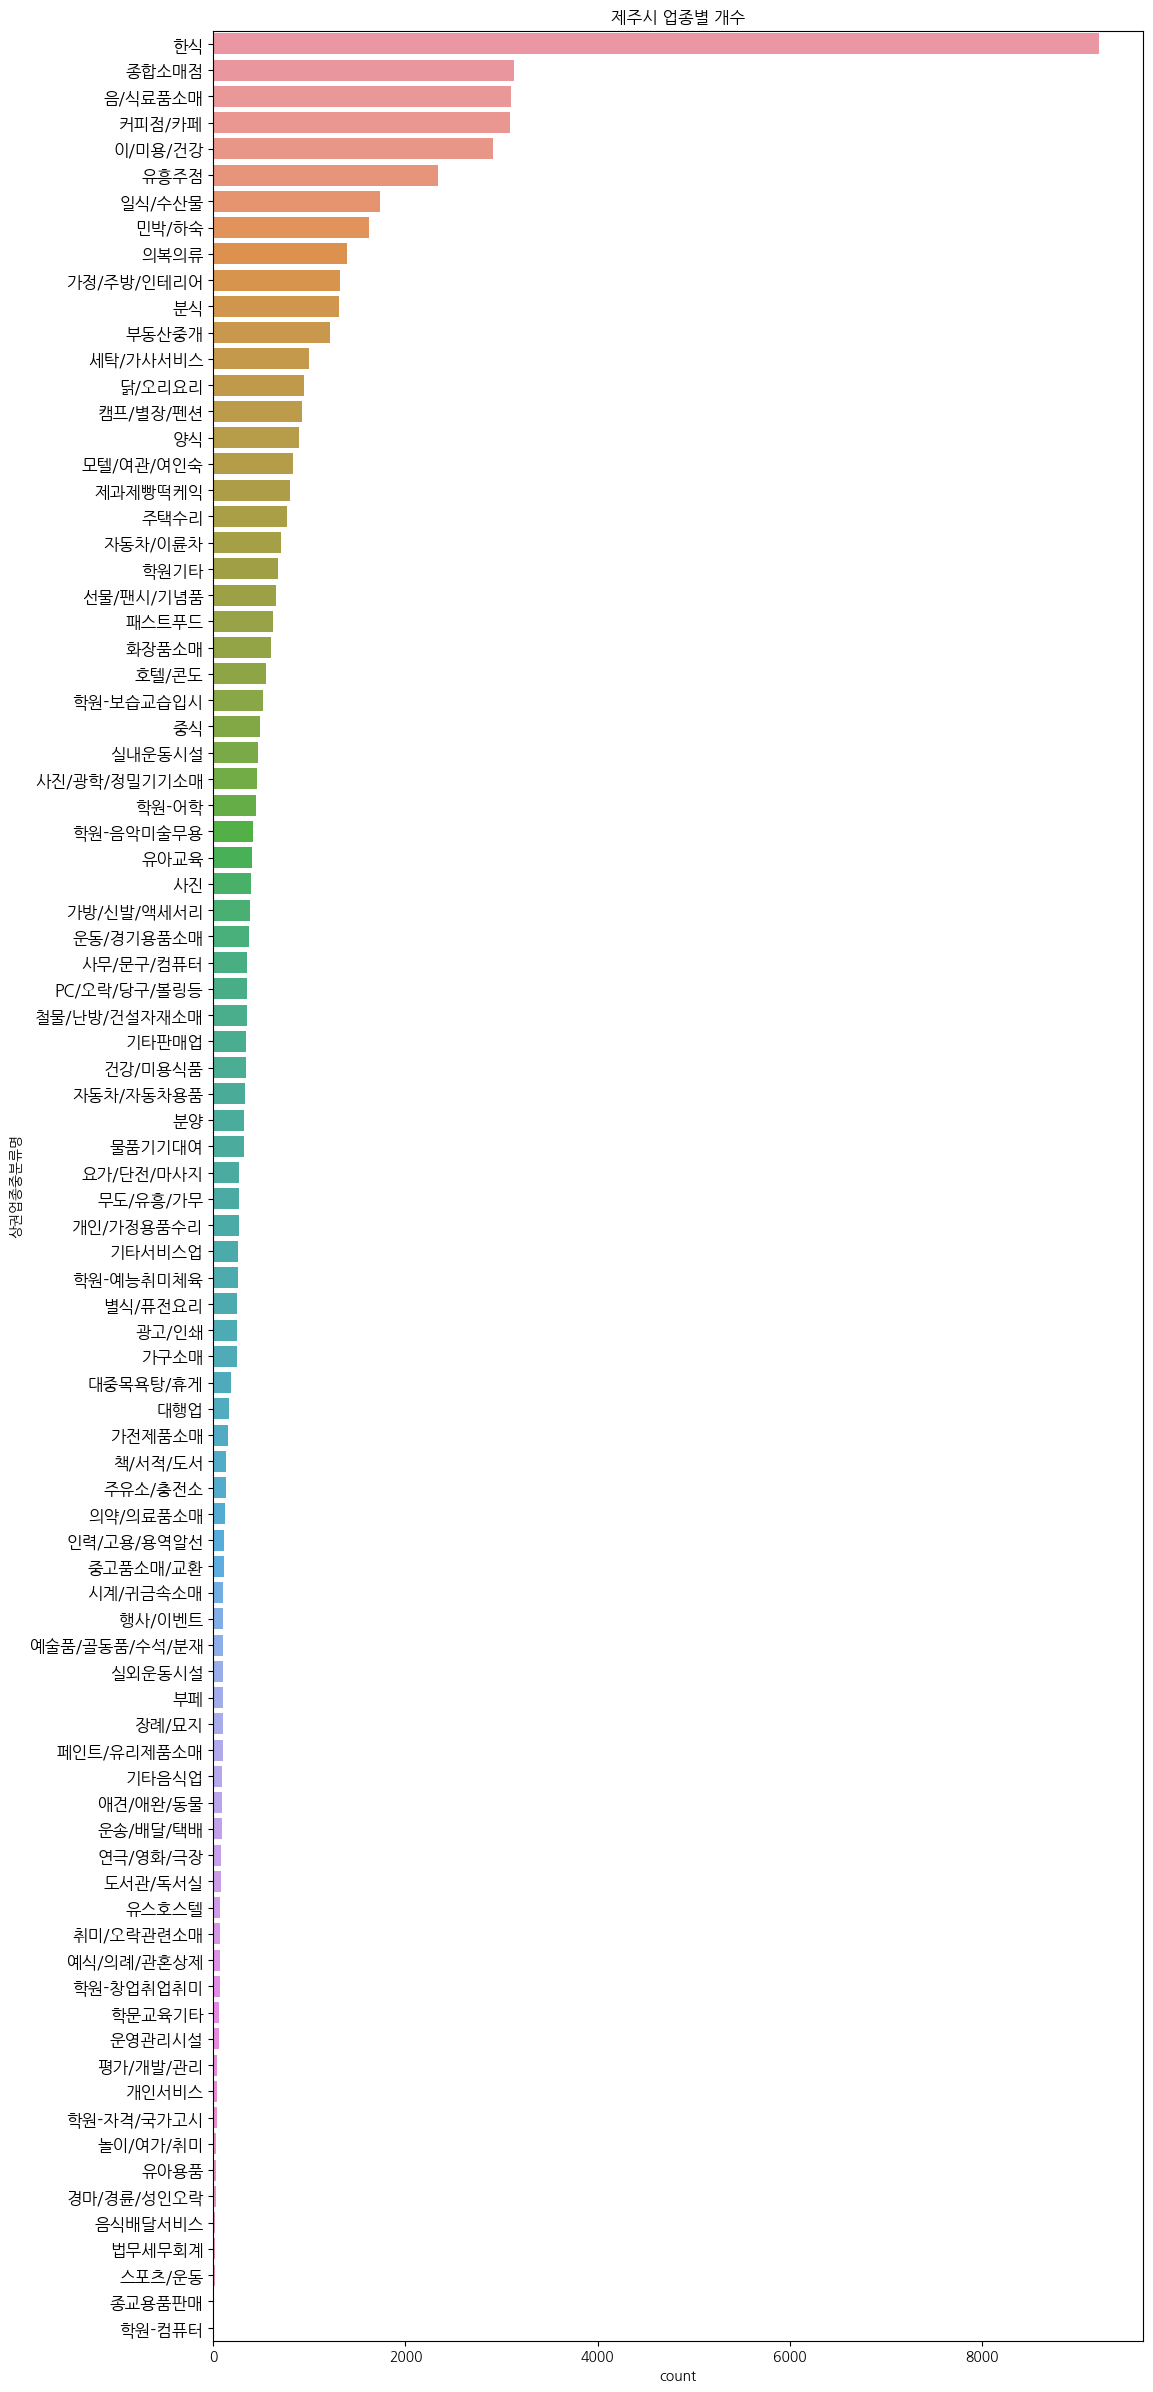

In [ ]:
# 코드입력
plt.figure(figsize=(12, 30))
sns.countplot(y=jeju['상권업종중분류명'], order=jeju['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('제주시 업종별 개수')
plt.show()

**그래프를 보시면 순서를 확인할 수 있습니다.**

그럼 **커피점/카페** 업종은 자치구별로 **어느 곳에 가장 많이 분포**해 있는지 시각화해 보겠습니다.

In [ ]:
jeju

시군구명 상권업종대분류명    상권업종중분류명         위도          경도
0      서귀포시      부동산       부동산중개  33.250877  126.561556
1      서귀포시       숙박       호텔/콘도  33.248179  126.559015
2       제주시       음식        유흥주점  33.412363  126.264860
3       제주시    생활서비스     이/미용/건강  33.485978  126.474887
4       제주시       소매  가정/주방/인테리어  33.511339  126.517956
...     ...      ...         ...        ...         ...
54289   제주시      부동산       부동산중개  33.490174  126.488447
54290   제주시       음식          한식  33.491446  126.538847
54291   제주시       음식          한식  33.512946  126.522675
54292  서귀포시       음식          한식  33.324772  126.833128
54293   제주시       음식          한식  33.499781  126.532401

[54294 rows x 5 columns]

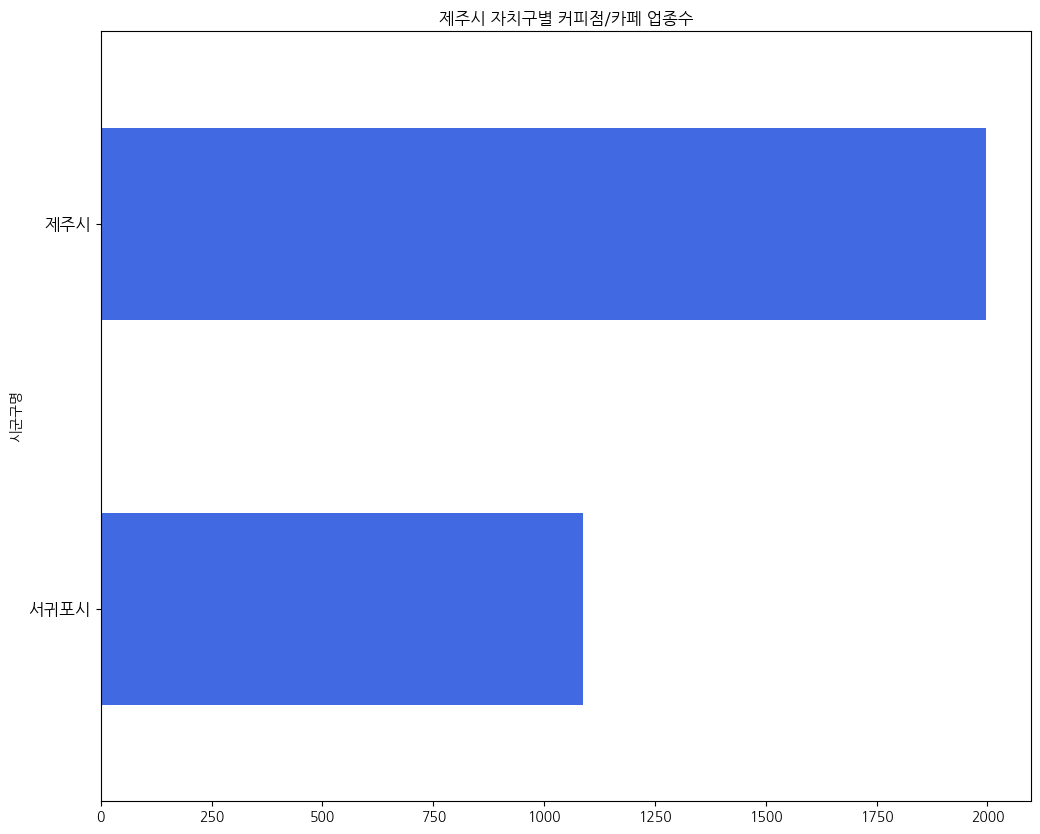

In [ ]:
# 코드입력
plt.figure(figsize=(12, 10))
jeju.loc[jeju['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종대분류명'].count()\
                                                     .sort_values().plot(kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('제주시 자치구별 커피점/카페 업종수')
plt.show()

In [ ]:
jeju_coffee = jeju.loc[jeju['상권업종중분류명'] == '커피점/카페']
jeju_coffee

시군구명 상권업종대분류명 상권업종중분류명         위도          경도
25      제주시       음식   커피점/카페  33.456186  126.710438
71      제주시       음식   커피점/카페  33.456081  126.556897
83      제주시       음식   커피점/카페  33.487651  126.492956
172     제주시       음식   커피점/카페  33.489192  126.490691
193     제주시       음식   커피점/카페  33.523128  126.583976
...     ...      ...      ...        ...         ...
54142  서귀포시       음식   커피점/카페  33.263419  126.621258
54194   제주시       음식   커피점/카페  33.340360  126.270908
54212  서귀포시       음식   커피점/카페  33.282845  126.732767
54243   제주시       음식   커피점/카페  33.472894  126.549088
54280   제주시       음식   커피점/카페  33.538422  126.670438

[3086 rows x 5 columns]

In [ ]:
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=12,
    tiles='cartodbpositron'
)

folium.GeoJson(
    jeju_geojson,
    name='지역구'
).add_to(m)

클러스터를 추가하여 지도위에 시각화 합니다.

In [ ]:
# 코드입력
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(jeju_coffee['위도'], jeju_coffee['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

m

In [ ]:
jeju_group_data = jeju.loc[jeju['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종중분류명'].count()
jeju_group_data

시군구명
서귀포시    1088
제주시     1998
Name: 상권업종중분류명, dtype: int64

`choropleth` 를 사용하여 시각화를 하면 업종 별 개수에 따른 색상의 차이를 두어 시각화를 해줍니다.

In [ ]:
# folium의 Choropleth 클래스를 사용하여 지도 생성
from folium.features import Choropleth

In [ ]:
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    jeju_geojson,
    name='지역명'
).add_to(m)

In [ ]:
# 지역별로 커피 업종 수를 색깔로 표시
Choropleth(
    geo_data=jeju_geojson,
    data=jeju_group_data,
    columns=['시군구명', '커피 업종 수'],
    key_on='feature.properties.sggnm',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="지역별 커피 업종 수"
).add_to(m)

m


`bins`를 만들어 **1/4, 2/4, 3/4분위수별**로 구간을 나누어 시각화할 수 있습니다.

In [ ]:
# GeoJSON 데이터 로드
with open('/content/hangjeongdong_제주특별자치도.geojson', 'r', encoding='utf-8') as f:
    jeju_geojson = json.load(f)

# GeoJSON에서 '읍', '면', '동' 정보 추출
geojson_areas = [feature['properties']['adm_nm'] for feature in jeju_geojson['features']]

# 일부 데이터 확인
geojson_areas[:10]

['제주특별자치도 제주시 한림읍',
 '제주특별자치도 제주시 애월읍',
 '제주특별자치도 제주시 구좌읍',
 '제주특별자치도 제주시 조천읍',
 '제주특별자치도 제주시 한경면',
 '제주특별자치도 제주시 추자면',
 '제주특별자치도 제주시 우도면',
 '제주특별자치도 제주시 일도1동',
 '제주특별자치도 제주시 일도2동',
 '제주특별자치도 제주시 이도1동']

In [ ]:
jeju_geojson

{'type': 'FeatureCollection',
 'name': 'temp',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 3394,
    'adm_nm': '제주특별자치도 제주시 한림읍',
    'adm_cd': '3901011',
    'adm_cd2': '5011025000',
    'sgg': '50110',
    'sido': '50',
    'sidonm': '제주특별자치도',
    'sggnm': '제주시'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.23127933634665, 33.4047465707345],
       [126.22993897332888, 33.40412962446276],
       [126.22589028533956, 33.40408960161301],
       [126.22500509205072, 33.404219774806876],
       [126.22487574987228, 33.40424582326579],
       [126.2233554133589, 33.40497269590151],
       [126.22323427626428, 33.40503080086705],
       [126.22243703533582, 33.40548011869599],
       [126.22209085104105, 33.405681356174604],
       [126.22201762958439, 33.405787125027516],
       [126.22198203505886, 33.40588897944633],
       [126.22180012754559, 33.410023490935

In [ ]:
# 제주 상권정보 데이터를 로드합니다
sangga_info = pd.read_csv('/content/소상공인시장진흥공단_상가_상권_정보_제주_202212.csv')


In [ ]:
sangga_info

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드    상권업종중분류명  \
0      21706657          동경부동산  NaN         L      부동산       L01       부동산중개   
1      17174231  에프케이알레그리아호텔제주  NaN         O       숙박       O01       호텔/콘도   
2      17173846       아빠가닭튀기는집  NaN         Q       음식       Q09        유흥주점   
3      20823993         현임옥헤어샵  NaN         F    생활서비스       F01     이/미용/건강   
4      15517264          금실홈패션  NaN         D       소매       D07  가정/주방/인테리어   
...         ...            ...  ...       ...      ...       ...         ...   
54289  19081186     파워공인중개사사무소  NaN         L      부동산       L01       부동산중개   
54290  19082384            에이룸  NaN         Q       음식       Q01          한식   
54291  19082788           삼도밥상  NaN         Q       음식       Q01          한식   
54292  19075000        한우소머리국밥  NaN         Q       음식       Q01          한식   
54293  19078777          엄마의밥상  NaN         Q       음식       Q01          한식   

      상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0        L01A01      부동산중개   L68221  ...  5013010100102900005031397   
1        O01A01      호텔/콘도      NaN  ...  5013010100103190002000005   
2        Q09A01      호프/맥주   I56219  ...  5011025024011990003006865   
3        F01A01      여성미용실   S96112  ...  5011012200126130007064597   
4        D07A09        홈패션   G47411  ...  5011010800101350009019203   
...         ...        ...      ...  ...                        ...   
54289    L01A01      부동산중개   L68221  ...  5011013700102600039000001   
54290    Q01A01  한식/백반/한정식   I56111  ...  5011010400119900014000001   
54291    Q01A01  한식/백반/한정식   I56111  ...  5011010600100730001021768   
54292    Q01A01  한식/백반/한정식   I56111  ...  5013032021106340041000001   
54293    Q01A01  한식/백반/한정식   I56111  ...  5011010400111780001044331   

                건물명                           도로명주소   구우편번호    신우편번호  동정보  \
0             동문레코드           제주특별자치도 서귀포시 중앙로 70-1  697843  63591.0  NaN   
1      비스타케이호텔(천지연)         제주특별자치도 서귀포시 중앙로47번길 25  697844  63592.0  NaN   
2               NaN        제주특별자치도 제주시 한림읍 한림중앙로 26  695932  63032.0  NaN   
3               NaN            제주특별자치도 제주시 정존11길 29  690805  63102.0  NaN   
4            서문공설시장          제주특별자치도 제주시 서문로4길 13-2  690819  63154.0  NaN   
...             ...                             ...     ...      ...  ...   
54289  연동태홍누리안3차아파트              제주특별자치도 제주시 삼무로 15  690813  63125.0  NaN   
54290           NaN          제주특별자치도 제주시 남광로2길 17-7  690851  63231.0  NaN   
54291           NaN              제주특별자치도 제주시 관덕로 32  690809  63168.0  NaN   
54292           NaN  제주특별자치도 서귀포시 표선면 표선중앙로90번길 9-2  699914  63629.0  NaN   
54293           NaN            제주특별자치도 제주시 광양11길 22  690827  63209.0  NaN   

       층정보  호정보          경도         위도  
0      NaN  NaN  126.561556  33.250877  
1      NaN  NaN  126.559015  33.248179  
2      NaN  NaN  126.264860  33.412363  
3      NaN  NaN  126.474887  33.485978  
4      NaN  NaN  126.517956  33.511339  
...    ...  ...         ...        ...  
54289  NaN  NaN  126.488447  33.490174  
54290    1  NaN  126.538847  33.491446  
54291    1  NaN  126.522675  33.512946  
54292  NaN  NaN  126.833128  33.324772  
54293  NaN  NaN  126.532401  33.499781  

[54294 rows x 39 columns]

In [ ]:
# 상가 정보 데이터에서 '도로명주소'에서 '읍', '면', '동' 추출
sangga_info['행정구역'] = sangga_info['도로명주소'].str.extract(r'제주특별자치도 (제주시|서귀포시) ([^ ]*(읍|면|동))')[1]

# NaN 값 제거
sangga_info = sangga_info.dropna(subset=['행정구역'])

# 행정구역별로 상가 업종 수 집계
area_shop_data = sangga_info.groupby('행정구역').size().reset_index(name='상가 업종 수')

area_shop_data.head()


행정구역  상가 업종 수
0  간월동       55
1  거로동        5
2  고산동       98
3  과원동        2
4  광평동       51

In [ ]:
# 두 데이터 사이의 일치하지 않는 행정구역 이름 확인
non_matching_areas_geojson = set(geojson_areas) - set(area_shop_data['행정구역'])
non_matching_areas_data = set(area_shop_data['행정구역']) - set(geojson_areas)

len(non_matching_areas_geojson), len(non_matching_areas_data), non_matching_areas_geojson, non_matching_areas_data


(43,
 62,
 {'제주특별자치도 서귀포시 남원읍',
  '제주특별자치도 서귀포시 대륜동',
  '제주특별자치도 서귀포시 대정읍',
  '제주특별자치도 서귀포시 대천동',
  '제주특별자치도 서귀포시 동홍동',
  '제주특별자치도 서귀포시 서홍동',
  '제주특별자치도 서귀포시 성산읍',
  '제주특별자치도 서귀포시 송산동',
  '제주특별자치도 서귀포시 안덕면',
  '제주특별자치도 서귀포시 영천동',
  '제주특별자치도 서귀포시 예래동',
  '제주특별자치도 서귀포시 정방동',
  '제주특별자치도 서귀포시 중문동',
  '제주특별자치도 서귀포시 중앙동',
  '제주특별자치도 서귀포시 천지동',
  '제주특별자치도 서귀포시 표선면',
  '제주특별자치도 서귀포시 효돈동',
  '제주특별자치도 제주시 건입동',
  '제주특별자치도 제주시 구좌읍',
  '제주특별자치도 제주시 노형동',
  '제주특별자치도 제주시 도두동',
  '제주특별자치도 제주시 봉개동',
  '제주특별자치도 제주시 삼도1동',
  '제주특별자치도 제주시 삼도2동',
  '제주특별자치도 제주시 삼양동',
  '제주특별자치도 제주시 아라동',
  '제주특별자치도 제주시 애월읍',
  '제주특별자치도 제주시 연동',
  '제주특별자치도 제주시 오라동',
  '제주특별자치도 제주시 외도동',
  '제주특별자치도 제주시 용담1동',
  '제주특별자치도 제주시 용담2동',
  '제주특별자치도 제주시 우도면',
  '제주특별자치도 제주시 이도1동',
  '제주특별자치도 제주시 이도2동',
  '제주특별자치도 제주시 이호동',
  '제주특별자치도 제주시 일도1동',
  '제주특별자치도 제주시 일도2동',
  '제주특별자치도 제주시 조천읍',
  '제주특별자치도 제주시 추자면',
  '제주특별자치도 제주시 한경면',
  '제주특별자치도 제주시 한림읍',
  '제주특별자치도 제주시 화북동'},
 {'간월동',
  '거로동',
  '고산동',
  '과원동',
  '광평동',
  '구남동',
  '구릉동',

In [ ]:
# 행정구역명에 알맞은 접두어 추가
def add_city_prefix(area_name):
    if '제주시' in area_name or area_name.endswith('동'):
        return '제주특별자치도 제주시 ' + area_name
    else:
        return '제주특별자치도 서귀포시 ' + area_name

area_shop_data['행정구역'] = area_shop_data['행정구역'].apply(add_city_prefix)

# 일치하지 않는 행정구역명 재확인
non_matching_areas_geojson_revised = set(geojson_areas) - set(area_shop_data['행정구역'])
non_matching_areas_data_revised = set(area_shop_data['행정구역']) - set(geojson_areas)

len(non_matching_areas_geojson_revised), len(non_matching_areas_data_revised), non_matching_areas_geojson_revised, non_matching_areas_data_revised


(36,
 55,
 {'제주특별자치도 서귀포시 대륜동',
  '제주특별자치도 서귀포시 대천동',
  '제주특별자치도 서귀포시 동홍동',
  '제주특별자치도 서귀포시 서홍동',
  '제주특별자치도 서귀포시 송산동',
  '제주특별자치도 서귀포시 영천동',
  '제주특별자치도 서귀포시 예래동',
  '제주특별자치도 서귀포시 정방동',
  '제주특별자치도 서귀포시 중문동',
  '제주특별자치도 서귀포시 중앙동',
  '제주특별자치도 서귀포시 천지동',
  '제주특별자치도 서귀포시 효돈동',
  '제주특별자치도 제주시 건입동',
  '제주특별자치도 제주시 구좌읍',
  '제주특별자치도 제주시 노형동',
  '제주특별자치도 제주시 도두동',
  '제주특별자치도 제주시 삼도1동',
  '제주특별자치도 제주시 삼도2동',
  '제주특별자치도 제주시 삼양동',
  '제주특별자치도 제주시 아라동',
  '제주특별자치도 제주시 애월읍',
  '제주특별자치도 제주시 오라동',
  '제주특별자치도 제주시 외도동',
  '제주특별자치도 제주시 용담1동',
  '제주특별자치도 제주시 용담2동',
  '제주특별자치도 제주시 우도면',
  '제주특별자치도 제주시 이도1동',
  '제주특별자치도 제주시 이도2동',
  '제주특별자치도 제주시 이호동',
  '제주특별자치도 제주시 일도1동',
  '제주특별자치도 제주시 일도2동',
  '제주특별자치도 제주시 조천읍',
  '제주특별자치도 제주시 추자면',
  '제주특별자치도 제주시 한경면',
  '제주특별자치도 제주시 한림읍',
  '제주특별자치도 제주시 화북동'},
 {'제주특별자치도 서귀포시 구좌읍',
  '제주특별자치도 서귀포시 애월읍',
  '제주특별자치도 서귀포시 우도면',
  '제주특별자치도 서귀포시 조천읍',
  '제주특별자치도 서귀포시 추자면',
  '제주특별자치도 서귀포시 한경면',
  '제주특별자치도 서귀포시 한림읍',
  '제주특별자치도 제주시 간월동',
  '제주특별자치도 제주시 거로동',
  '제주특별자치도 제주시 고산

In [ ]:
# 지도 초기화
m = folium.Map(
    location=[33.50028185187966, 126.53145977090163],
    zoom_start=11,
    tiles='cartodbpositron'
)

# 읍면동별로 상가 업종 수를 색깔로 표시
Choropleth(
    geo_data=jeju_geojson,
    data=area_shop_data,
    columns=['행정구역', '상가 업종 수'],
    key_on='feature.properties.adm_nm',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="읍면동별 상가 업종 수"
).add_to(m)

m


In [ ]:
import pandas as pd

# 파일을 읽어보기
data = pd.read_excel("/content/구주소_20150707.xls")
data.head()

우편번호  일련번호 주    소 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0       NaN   NaN     시도        시군구        읍면동          리         도서   
1  210821.0   1.0    강원도        강릉시        강동면        모전리        NaN   
2  210822.0   1.0    강원도        강릉시        강동면       산성우리        NaN   
3  210821.0  21.0    강원도        강릉시        강동면       상시동리        NaN   
4  210822.0  21.0    강원도        강릉시        강동면        심곡리        NaN   

  산\r\n번\r\n지 시작번지 Unnamed: 9  끝번지 Unnamed: 11 아파트/건물명  동범위 Unnamed: 14  \
0         NaN    주          부    주           부     NaN   시작           끝   
1         NaN  NaN        NaN  NaN         NaN     NaN  NaN         NaN   
2         NaN  NaN        NaN  NaN         NaN     NaN  NaN         NaN   
3         NaN  NaN        NaN  NaN         NaN     NaN  NaN         NaN   
4         NaN  NaN        NaN  NaN         NaN     NaN  NaN         NaN   

          변경일         주       소  
0         NaN               NaN  
1  20040517.0   강원도 강릉시 강동면 모전리  
2  20040517.0  강원도 강릉시 강동면 산성우리  
3  20040517.0  강원도 강릉시 강동면 상시동리  
4  20040517.0   강원도 강릉시 강동면 심곡리

In [ ]:
# '우편번호'와 '주소' 컬럼만 추출
address_data = data[["우편번호", "주       소"]].copy()

# NaN 값 제거
address_data = address_data.dropna()

# 첫 줄은 헤더와 같은 정보이므로 제거
address_data = address_data.iloc[1:]

address_data.head()

우편번호         주       소
2  210822.0  강원도 강릉시 강동면 산성우리
3  210821.0  강원도 강릉시 강동면 상시동리
4  210822.0   강원도 강릉시 강동면 심곡리
5  210824.0   강원도 강릉시 강동면 안인리
6  210824.0  강원도 강릉시 강동면 안인진리

In [ ]:
# 소상공인시장진흥공단의 정보 파일을 읽어옴
small_business_data = pd.read_csv("/content/소상공인시장진흥공단_상가_상권_정보_제주_202212.csv", encoding="utf-8")

# 데이터의 상위 부분 확인
small_business_data.head()

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드    상권업종중분류명  \
0  21706657          동경부동산  NaN         L      부동산       L01       부동산중개   
1  17174231  에프케이알레그리아호텔제주  NaN         O       숙박       O01       호텔/콘도   
2  17173846       아빠가닭튀기는집  NaN         Q       음식       Q09        유흥주점   
3  20823993         현임옥헤어샵  NaN         F    생활서비스       F01     이/미용/건강   
4  15517264          금실홈패션  NaN         D       소매       D07  가정/주방/인테리어   

  상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호           건물명  \
0    L01A01    부동산중개   L68221  ...  5013010100102900005031397         동문레코드   
1    O01A01    호텔/콘도      NaN  ...  5013010100103190002000005  비스타케이호텔(천지연)   
2    Q09A01    호프/맥주   I56219  ...  5011025024011990003006865           NaN   
3    F01A01    여성미용실   S96112  ...  5011012200126130007064597           NaN   
4    D07A09      홈패션   G47411  ...  5011010800101350009019203        서문공설시장   

                      도로명주소   구우편번호    신우편번호  동정보  층정보  호정보          경도  \
0     제주특별자치도 서귀포시 중앙로 70-1  697843  63591.0  NaN  NaN  NaN  126.561556   
1   제주특별자치도 서귀포시 중앙로47번길 25  697844  63592.0  NaN  NaN  NaN  126.559015   
2  제주특별자치도 제주시 한림읍 한림중앙로 26  695932  63032.0  NaN  NaN  NaN  126.264860   
3      제주특별자치도 제주시 정존11길 29  690805  63102.0  NaN  NaN  NaN  126.474887   
4    제주특별자치도 제주시 서문로4길 13-2  690819  63154.0  NaN  NaN  NaN  126.517956   

          위도  
0  33.250877  
1  33.248179  
2  33.412363  
3  33.485978  
4  33.511339  

[5 rows x 39 columns]

In [ ]:
small_business_data

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드    상권업종중분류명  \
0      21706657          동경부동산  NaN         L      부동산       L01       부동산중개   
1      17174231  에프케이알레그리아호텔제주  NaN         O       숙박       O01       호텔/콘도   
2      17173846       아빠가닭튀기는집  NaN         Q       음식       Q09        유흥주점   
3      20823993         현임옥헤어샵  NaN         F    생활서비스       F01     이/미용/건강   
4      15517264          금실홈패션  NaN         D       소매       D07  가정/주방/인테리어   
...         ...            ...  ...       ...      ...       ...         ...   
54289  19081186     파워공인중개사사무소  NaN         L      부동산       L01       부동산중개   
54290  19082384            에이룸  NaN         Q       음식       Q01          한식   
54291  19082788           삼도밥상  NaN         Q       음식       Q01          한식   
54292  19075000        한우소머리국밥  NaN         Q       음식       Q01          한식   
54293  19078777          엄마의밥상  NaN         Q       음식       Q01          한식   

      상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0        L01A01      부동산중개   L68221  ...  5013010100102900005031397   
1        O01A01      호텔/콘도      NaN  ...  5013010100103190002000005   
2        Q09A01      호프/맥주   I56219  ...  5011025024011990003006865   
3        F01A01      여성미용실   S96112  ...  5011012200126130007064597   
4        D07A09        홈패션   G47411  ...  5011010800101350009019203   
...         ...        ...      ...  ...                        ...   
54289    L01A01      부동산중개   L68221  ...  5011013700102600039000001   
54290    Q01A01  한식/백반/한정식   I56111  ...  5011010400119900014000001   
54291    Q01A01  한식/백반/한정식   I56111  ...  5011010600100730001021768   
54292    Q01A01  한식/백반/한정식   I56111  ...  5013032021106340041000001   
54293    Q01A01  한식/백반/한정식   I56111  ...  5011010400111780001044331   

                건물명                           도로명주소   구우편번호    신우편번호  동정보  \
0             동문레코드           제주특별자치도 서귀포시 중앙로 70-1  697843  63591.0  NaN   
1      비스타케이호텔(천지연)         제주특별자치도 서귀포시 중앙로47번길 25  697844  63592.0  NaN   
2               NaN        제주특별자치도 제주시 한림읍 한림중앙로 26  695932  63032.0  NaN   
3               NaN            제주특별자치도 제주시 정존11길 29  690805  63102.0  NaN   
4            서문공설시장          제주특별자치도 제주시 서문로4길 13-2  690819  63154.0  NaN   
...             ...                             ...     ...      ...  ...   
54289  연동태홍누리안3차아파트              제주특별자치도 제주시 삼무로 15  690813  63125.0  NaN   
54290           NaN          제주특별자치도 제주시 남광로2길 17-7  690851  63231.0  NaN   
54291           NaN              제주특별자치도 제주시 관덕로 32  690809  63168.0  NaN   
54292           NaN  제주특별자치도 서귀포시 표선면 표선중앙로90번길 9-2  699914  63629.0  NaN   
54293           NaN            제주특별자치도 제주시 광양11길 22  690827  63209.0  NaN   

       층정보  호정보          경도         위도  
0      NaN  NaN  126.561556  33.250877  
1      NaN  NaN  126.559015  33.248179  
2      NaN  NaN  126.264860  33.412363  
3      NaN  NaN  126.474887  33.485978  
4      NaN  NaN  126.517956  33.511339  
...    ...  ...         ...        ...  
54289  NaN  NaN  126.488447  33.490174  
54290    1  NaN  126.538847  33.491446  
54291    1  NaN  126.522675  33.512946  
54292  NaN  NaN  126.833128  33.324772  
54293  NaN  NaN  126.532401  33.499781  

[54294 rows x 39 columns]

In [ ]:
# '우편번호' 컬럼을 실수에서 정수로 변환
address_data["우편번호"] = address_data["우편번호"].astype(int)

# 소상공인시장진흥공단의 데이터와 주소 데이터를 '구우편번호'로 합치기
merged_data_corrected = pd.merge(small_business_data, address_data, left_on="구우편번호", right_on="우편번호", how="left")

# 필요한 컬럼만 추출
result_data_corrected = merged_data_corrected[["구우편번호", "신우편번호", "주       소"]]

# 결과의 상위 부분 확인
result_data_corrected.head()

NameError: ignored

In [ ]:
import geopandas as gpd

# geojson 파일 로드
geo_data = gpd.read_file("/content/hangjeongdong_제주특별자치도.geojson")

# geojson 파일의 상위 부분 확인
geo_data.head()

In [ ]:
# 'adm_nm' 컬럼에서 읍, 면, 동 정보만 추출
geo_data["읍면동"] = geo_data["adm_nm"].apply(lambda x: x.split()[-1])

# 추출한 결과 확인
geo_data[["adm_nm", "읍면동"]].head()

In [ ]:
# result_data_corrected의 "주소"에서 시/도, 시/군/구, 읍/면/동 정보 추출
result_data_corrected["시도"] = result_data_corrected["주       소"].apply(lambda x: x.split()[0] if len(x.split()) > 0 else "")
result_data_corrected["시군구"] = result_data_corrected["주       소"].apply(lambda x: x.split()[1] if len(x.split()) > 1 else "")
result_data_corrected["읍면동"] = result_data_corrected["주       소"].apply(lambda x: x.split()[2] if len(x.split()) > 2 else "")

# geo_data의 "adm_nm"에서 시/도, 시/군/구, 읍/면/동 정보 추출
geo_data["시도"] = geo_data["adm_nm"].apply(lambda x: x.split()[0] if len(x.split()) > 0 else "")
geo_data["시군구"] = geo_data["adm_nm"].apply(lambda x: x.split()[1] if len(x.split()) > 1 else "")

# 확인
result_data_corrected[["시도", "시군구", "읍면동"]].head(), geo_data[["시도", "시군구", "읍면동"]].head()

In [ ]:
# 두 데이터셋을 시/도, 시/군/구, 읍/면/동 기준으로 매핑
merged_by_address = pd.merge(geo_data, result_data_corrected, on=["시도", "시군구", "읍면동"], how="left")

# 각 읍/면/동별 상가 개수 집계
store_counts_by_address = merged_by_address.groupby(["시도", "시군구", "읍면동"]).size().reset_index(name="상가개수")

# geo_data와 상가 개수 데이터 매핑
final_merged = pd.merge(geo_data, store_counts_by_address, on=["시도", "시군구", "읍면동"], how="left")

# NaN 값을 0으로 대체
final_merged["상가개수"].fillna(0, inplace=True)

final_merged[["시도", "시군구", "읍면동", "상가개수"]].head()

In [ ]:
import folium

In [ ]:
# 지도 생성
jeju_coordinates_updated = [33.3666, 126.5333]
m2 = folium.Map(location=jeju_coordinates_updated, zoom_start=10, tiles="cartodbpositron")

# 상가 개수에 따른 색상 설정
folium.Choropleth(
    geo_data=final_merged.to_json(),
    name="choropleth",
    data=final_merged,
    columns=["읍면동", "상가개수"],
    key_on="feature.properties.읍면동",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="상가 개수"
).add_to(m2)

# 지도에 상점 개수를 표시
for _, row in final_merged.iterrows():
    if row["상가개수"] > 0:
        centroid = row["geometry"].centroid
        folium.CircleMarker(
            location=[centroid.y, centroid.x],
            radius=5,
            popup=f"{row['읍면동']} : {row['상가개수']}개",
            fill=True,
            fill_color="#3186cc",
            fill_opacity=0.7,
            color="white",
            weight=0.5,
        ).add_to(m2)

m2

## Html 파일로 저장

저장은 `save()` 함수로 쉽게 html 파일로 저장할 수 있습니다.

In [ ]:
m.save('map.html')

## 참고 (References)

- [Folium 0.12.1 documentation](https://python-visualization.github.io/folium/)